In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
from transformers import BertTokenizer, TFBertForSequenceClassification
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense
from scipy.stats import skew

df = pd.read_excel('/content/training_set_rel3.xlsx')

print(df.head(10))

print(df.shape)


   essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4         5          1  Dear @LOCATION1, I know having computers has a...   
5         6          1  Dear @LOCATION1, I think that computers have a...   
6         7          1  Did you know that more and more people these d...   
7         8          1  @PERCENT1 of people agree that computers make ...   
8         9          1  Dear reader, @ORGANIZATION1 has had a dramatic...   
9        10          1  In the @LOCATION1 we have the technology of a ...   

   rater1_domain1  rater2_domain1  rater3_domain1  domain1_score  \
0             4.0             4.0             NaN            8.0   
1             5.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12978 entries, 0 to 12977
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12978 non-null  int64  
 1   essay_set       12978 non-null  int64  
 2   essay           12978 non-null  object 
 3   rater1_domain1  12977 non-null  float64
 4   rater2_domain1  12977 non-null  float64
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12977 non-null  float64
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [ ]:
columns = ['essay_id', 'essay_set','essay','rater1_domain1', 'rater2_domain1']
df = pd.DataFrame(df, columns=columns)
df

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0
...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0
12976,21630,8,Trippin' on fen...,20.0,20.0


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Define the function to clean the text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove excessive whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stop words
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]

    # Join the filtered words back into a single string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

# Drop rows where 'essay' column is NaN
df = df.dropna(subset=['essay'])

# Create a new column 'essay_new' with the cleaned text
df['pro_essay'] = df['essay'].astype(str).apply(clean_text)


# Display the DataFrame shape
print(df.shape)

df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(12978, 6)


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,pro_essay
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,"dear local newspaper, think effects computers ..."
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,"dear @caps1 @caps2, believe using computers be..."
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,"dear, @caps1 @caps2 @caps3 people use computer..."
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,"dear local newspaper, @caps1 found many expert..."
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,"dear @location1, know computers positive effec..."
...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,stories mothers daughters either enemies frien...
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,never understood meaning laughter shortest dis...
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,"laugh, @caps5 habit, @caps1 cause? causes laug..."
12976,21630,8,Trippin' on fen...,20.0,20.0,"trippin' fences @num1 years young, short @num1..."


In [ ]:
# Function to extract placeholders starting with '@'
def extract_placeholders(text):
    # Find all placeholders starting with '@'
    return re.findall(r'@\w+', text)

# Drop rows with NaN in the 'essay' column
df = df.dropna(subset=['pro_essay'])

# Extract all placeholders from the 'essay' column
placeholders_series = df['pro_essay'].astype(str).apply(extract_placeholders)

# Flatten the list of lists and get unique placeholders as a set
unique_placeholders = set(placeholder for placeholders in placeholders_series for placeholder in placeholders)

# Output the set of unique placeholders
print("Unique placeholders as a set:")
print(unique_placeholders)
print(f"\nTotal unique placeholders: {len(unique_placeholders)}")

Unique placeholders as a set:
{'@caps16', '@caps18', '@percent6', '@caps37', '@money4', '@caps23', '@caps29', '@caps35', '@person6', '@caps10', '@caps31', '@time2', '@location7', '@caps52', '@person1', '@caps73', '@caps25', '@person2c', '@caps6', '@dr2', '@num13', '@caps43', '@num10', '@percent7', '@caps8', '@date2', '@location8', '@num7', '@num1r', '@caps1', '@caps4â', '@percent1of', '@num4', '@caps27', '@caps63', '@caps53', '@percent1', '@percent4', '@caps41', '@caps24', '@num2th', '@caps49', '@organization6', '@location4', '@num2nd', '@money3', '@month1', '@date6', '@caps34', '@num3', '@caps3', '@num1ed', '@num8', '@caps19', '@time2so', '@location5', '@caps5', '@person4', '@location10', '@time4', '@num5', '@location4a', '@caps3â', '@caps39', '@caps16â', '@num1th', '@num9', '@num1k', '@organization4', '@time1am', '@person2', '@caps26', '@caps55', '@caps56', '@state1', '@location9', '@dr1', '@money2', '@caps9', '@caps33', '@caps46', '@organization1', '@caps62', '@location6', '@date3',

In [ ]:
df = df.dropna(subset=['rater1_domain1', 'rater2_domain1'])
df['ratings'] = df[['rater1_domain1', 'rater2_domain1']].mean(axis=1)
df
ratings = df[['rater1_domain1', 'rater2_domain1']].mean(axis=1).values


In [ ]:
from scipy.stats import skew

stats = df['ratings'].describe()

# Advanced statistics
mean = df['ratings'].mean()
median = df['ratings'].median()
std_dev = df['ratings'].std()
variance = df['ratings'].var()
minimum = df['ratings'].min()
maximum = df['ratings'].max()
skewness = skew(df['ratings'], nan_policy='omit')  # Handle NaN safely
quantiles = df['ratings'].quantile([0.25, 0.5, 0.75])  # Quartiles


print("Statistics:")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Minimum: {minimum}")
print(f"Maximum: {maximum}")
print(f"Skewness: {skewness}")
print("\nQuantiles:")
print(quantiles)


Statistics:
Mean: 4.131964244432457
Median: 3.0
Standard Deviation: 4.20580452591282
Variance: 17.688791710188756
Minimum: 0.0
Maximum: 30.0
Skewness: 2.525961186613641

Quantiles:
0.25    2.0
0.50    3.0
0.75    4.0
Name: ratings, dtype: float64


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import numpy as np

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)

# Define a text cleaning function (ensure this exists or define it)
def clean_text(text):
    # Example cleaning: lowercasing and removing special characters
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Clean the essays
df['cleaned_essay'] = df['pro_essay'].apply(clean_text)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import BertTokenizer

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the essay texts and store the results
def tokenize_essay(text):
    return tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_tensors='np'
    )

# Apply tokenization to all essays in the DataFrame
tokenized = df['cleaned_essay'].apply(lambda x: tokenize_essay(x))


In [ ]:
input_ids = np.vstack([t['input_ids'] for t in tokenized])
attention_mask = np.vstack([t['attention_mask'] for t in tokenized])

print(f"Tokenized input_ids shape: {input_ids.shape}")
print(f"Tokenized attention_mask shape: {attention_mask.shape}")

Tokenized input_ids shape: (12977, 512)
Tokenized attention_mask shape: (12977, 512)


In [ ]:
ratings = df[['rater1_domain1', 'rater2_domain1']].mean(axis=1).values

assert len(input_ids) == len(attention_mask) == len(ratings)

In [ ]:
X = np.array(list(zip(input_ids, attention_mask)))  # Combine the input arrays into a single array
X_train, X_val, y_train, y_val = train_test_split(
    X, ratings, test_size=0.2, random_state=42
)

# Separate the input_ids and attention_mask after the split
train_input_ids, train_attention_mask = X_train[:, 0], X_train[:, 1]
val_input_ids, val_attention_mask = X_val[:, 0], X_val[:, 1]

# Convert back to the appropriate format
train_input_ids = np.array([x.tolist() for x in train_input_ids])
val_input_ids = np.array([x.tolist() for x in val_input_ids])

train_attention_mask = np.array([x.tolist() for x in train_attention_mask])
val_attention_mask = np.array([x.tolist() for x in val_attention_mask])


In [ ]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer
from tensorflow.keras.layers import Input, Dropout, Dense, LayerNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

class BertLayer(tf.keras.layers.Layer):
    def __init__(self, model_name='bert-base-uncased', num_labels=1, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

    def call(self, inputs):
        input_ids, attention_mask = inputs
        # Get the logits directly from the BERT model
        output = self.bert({'input_ids': input_ids, 'attention_mask': attention_mask})
        return output.logits  # Use logits as the output for regression

def build_essay_grading_model():
    """
    Builds a deep essay grading model using BERT with multiple dense layers, advanced regularization, and learning rate scheduling.
    """
    # Define inputs
    input_ids_input = Input(shape=(512,), dtype=tf.int32, name='input_ids')
    attention_mask_input = Input(shape=(512,), dtype=tf.int32, name='attention_mask')

    # Use a custom BERT layer (returns logits)
    logits = BertLayer()(inputs=[input_ids_input, attention_mask_input])

    # Add additional fully connected layers
    x = Dropout(0.5)(logits)  # Increased dropout rate for regularization
    x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)  # Dense layer with L2 regularization
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)  # Another dense layer with regularization
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)  # Another dense layer

    # Add layer normalization for improved training stability
    x = LayerNormalization()(x)

    # Final output layer for regression (essay score prediction)
    output = Dense(1, activation='linear', name='score')(x)

    # Compile the model
    model = tf.keras.Model(inputs=[input_ids_input, attention_mask_input], outputs=output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
        loss='mean_squared_error',
        metrics=['mae']
    )

    return model

# Example model building and summary
model = build_essay_grading_model()
model.summary()

# Early stopping callback to stop training when validation performance ceases to improve
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)    │ (None, 512)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_mask            │ (None, 512)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_layer (BertLayer)    │ (None, 1)              │              0 │ input_ids[0][0],       │
│                           │                        │                │ attention_mask[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 1)              │              0 │ bert_layer[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1024)           │          2,048 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 1024)           │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 512)            │        524,800 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 512)            │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 256)            │        131,328 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 256)            │            512 │ dense_2[0][0]          │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ score (Dense)             │ (None, 1)              │            257 │ layer_normalization[0… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 658,945 (2.51 MB)

 Trainable params: 658,945 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    [train_input_ids, train_attention_mask], y_train,
    validation_data=([val_input_ids, val_attention_mask], y_val),
    epochs=5,
    batch_size=16,
    callbacks=[early_stopping]
)

Epoch 1/5
649/649 ━━━━━━━━━━━━━━━━━━━━ 513s 750ms/step - loss: 31.6127 - mae: 2.8865 - val_loss: 26.7245 - val_mae: 2.8786
Epoch 2/5
649/649 ━━━━━━━━━━━━━━━━━━━━ 479s 737ms/step - loss: 25.4948 - mae: 2.6379 - val_loss: 25.5920 - val_mae: 2.7156
Epoch 3/5
649/649 ━━━━━━━━━━━━━━━━━━━━ 444s 648ms/step - loss: 24.7596 - mae: 2.6584 - val_loss: 24.9762 - val_mae: 2.7969
Epoch 4/5
649/649 ━━━━━━━━━━━━━━━━━━━━ 447s 655ms/step - loss: 24.5209 - mae: 2.6871 - val_loss: 24.5960 - val_mae: 2.7572
Epoch 5/5
649/649 ━━━━━━━━━━━━━━━━━━━━ 443s 656ms/step - loss: 23.9823 - mae: 2.6846 - val_loss: 24.3994 - val_mae: 2.6451


82/82 ━━━━━━━━━━━━━━━━━━━━ 90s 997ms/step - loss: 24.7005 - mae: 2.6386
Validation Loss: 24.399431228637695
Validation MAE: 2.6451151371002197


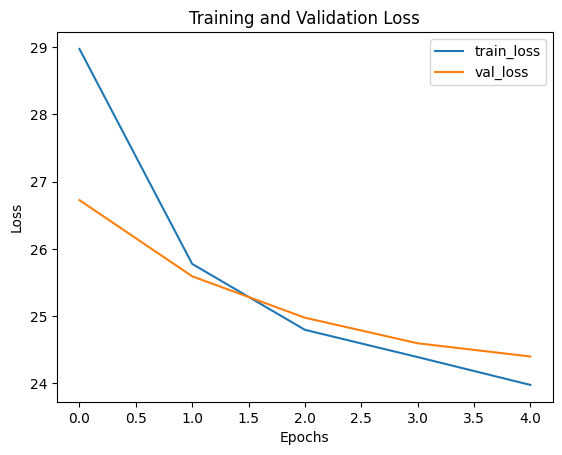

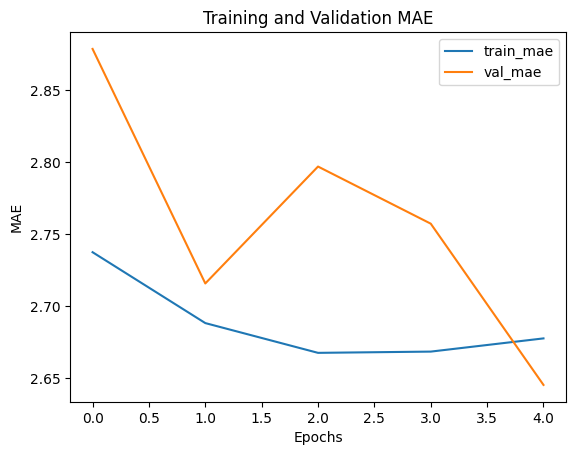

In [ ]:
# Evaluate the model on the validation set
val_loss, val_mae = model.evaluate(
    [val_input_ids, val_attention_mask], y_val
)

print(f"Validation Loss: {val_loss}")
print(f"Validation MAE: {val_mae}")

import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation MAE
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()


In [ ]:
def predict_essay_score(essay):
    # Tokenize the essay input
    tokenized = tokenize_essay(essay)
    input_ids = tokenized['input_ids']
    attention_mask = tokenized['attention_mask']

    # Make prediction using the model
    predicted_score = model.predict([input_ids, attention_mask])
    return predicted_score

def predict_from_file(file_path):
    # Read the content of the essay from a file
    with open(file_path, 'r') as file:
        essay_content = file.read()

    # Make a prediction using the content from the file
    predicted_score = predict_essay_score(essay_content)
    return predicted_score

# Example usage
file_path = '/content/love essay.txt'  # Replace with the path to your essay file
predicted_score = predict_from_file(file_path)
print(f"Predicted Score: {predicted_score}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted Score: [[4.151504]]
